In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [2]:
consumerKey="Vl1yCS3v3tS7psJ52P1IlCY9q"
consumerSecret="EWglg7zet8TFqg1OQsRAqqdUwxXvVvSPgA3kGBEu6xAnbWMyPy"
accessToken="1342236145434943488-XLkJIBNzc7grJwQxWqOt3SKImMkKix"
accessTokenSecret="tZQKrjLx2iQvcz8LxhUp4jjjPR8Bmmo48A91y6WtJLJ2k"


In [3]:
#pip install snscrape

In [4]:
query ="OrganicMeat"
tweets=[]
limit= 1000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
tweets_df= pd.DataFrame(tweets,columns=['Timestamp','User','Tweet'])
print(tweets_df)

                    Timestamp          User  \
0   2022-12-31 16:49:40+00:00   RawCowsMilk   
1   2022-12-31 06:50:52+00:00     khargosht   
2   2022-12-30 18:53:22+00:00  ClayTrader25   
3   2022-12-24 15:29:40+00:00  ClayTrader25   
4   2022-12-23 15:46:00+00:00   RawCowsMilk   
..                        ...           ...   
995 2018-01-14 03:48:50+00:00   Sighted_In_   
996 2018-01-14 01:50:06+00:00   Raptorazor1   
997 2018-01-14 01:12:27+00:00      flutefox   
998 2018-01-13 02:45:13+00:00   Raptorazor1   
999 2018-01-12 23:15:10+00:00   Raptorazor1   

                                                 Tweet  
0    Happy New Years Eve! We hope yours is as tasty...  
1    خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...  
2    My mom nailed this gift 💯 #selfsufficient #pra...  
3    From field to plate with some memories along t...  
4    Merry Christmas to you all ❤️🎄🐷 #organicfarmin...  
..                                                 ...  
995  Is there a better view? #Hunt #

In [5]:
tweets_df.shape

(1000, 3)

In [6]:
tweets_df.head(20)

,Timestamp,User,Tweet
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...
5,2022-12-22 08:07:09+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...
6,2022-12-22 07:58:22+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...
7,2022-12-21 05:00:01+00:00,GoodMeat254,"Farm-fresh, Organic, A-Grade Meat... Finger Li..."
8,2022-12-20 20:28:02+00:00,LifestyleSoln,Purchasing Organic Protein is a healthy diet h...
9,2022-12-20 13:36:43+00:00,WasedaFarms,We will be closed Saturday &amp; Sunday for Ch...


In [7]:
meat_refs=['Organic','Meat','meat','organicmeat', 'organic','chicken','A']
protein_refs=['protein', 'fresh','raw','gut friendly', 'healthy diet','freerange']

In [8]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag =1
    return flag

tweets_df['meat']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, meat_refs ))
tweets_df['chicken']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, protein_refs))


In [9]:
tweets_df.head()

,Timestamp,User,Tweet,meat,chicken
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...,1,0
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...,1,1


In [10]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT: ', '',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [11]:
tweets_df['Tweet'] = tweets_df['Tweet'].apply(cleanUpTweet)

In [12]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


In [13]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [14]:
tweets_df['Subjectivity']= tweets_df['Tweet'].apply(getTextSubjectivity)
tweets_df['Polarity']= tweets_df['Tweet'].apply(getTextPolarity)

In [15]:
tweets_df.head(50)
meat = tweets_df[tweets_df['meat'] ==1][['Timestamp','Polarity']]
meat = meat.sort_values(by = 'Timestamp', ascending = True)
meat['OR Polarity'] = meat.Polarity.rolling(10, min_periods=3).mean()

chicken = tweets_df[tweets_df['chicken'] ==1][['Timestamp','Polarity']]
chicken = chicken.sort_values(by = 'Timestamp', ascending = True)
chicken['OR Polarity'] = chicken.Polarity.rolling(10, min_periods=3).mean()

In [16]:
chicken.head()

,Timestamp,Polarity,OR Polarity
956,2018-02-12 22:26:40+00:00,-0.112500,NaN
955,2018-02-12 22:36:06+00:00,-0.112500,NaN
918,2018-04-10 22:12:53+00:00,-0.217188,-0.147396
917,2018-04-12 12:07:12+00:00,0.334722,-0.026866
910,2018-04-25 03:16:03+00:00,0.562500,0.091007


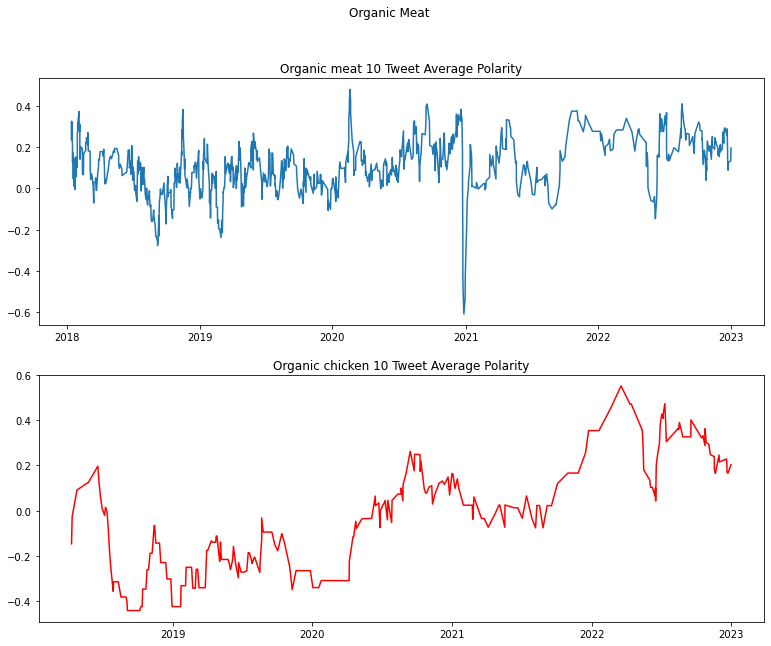

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(meat['Timestamp'], meat['OR Polarity'])
axes[0].set_title("\n".join(['Organic meat 10 Tweet Average Polarity']))

axes[1].plot(chicken['Timestamp'], chicken['OR Polarity'], color='red')
axes[1].set_title("\n".join(['Organic chicken 10 Tweet Average Polarity']))

fig.suptitle('\n'.join(['Organic Meat']), y=0.98)
plt.show()

In [18]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [19]:
tweets_df["Score"]= tweets_df['Polarity'].apply(getTextAnalysis)

In [20]:
tweets_df.head(50)

,Timestamp,User,Tweet,meat,chicken,Subjectivity,Polarity,Score
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1,0.727273,0.485227,Positive
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0,0.400000,0.400000,Positive
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 selfsufficient pract...,1,0,0.000000,0.000000,Neutral
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0,0.750000,0.812500,Positive
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 organicfarming...,1,1,0.000000,0.000000,Neutral
5,2022-12-22 08:07:09+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...,1,0,0.404167,-0.150000,Negative
6,2022-12-22 07:58:22+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...,1,0,0.516667,-0.200000,Negative
7,2022-12-21 05:00:01+00:00,GoodMeat254,"Farm-fresh, Organic, A-Grade Meat... Finger Li...",1,1,0.000000,0.000000,Neutral
8,2022-12-20 20:28:02+00:00,LifestyleSoln,Purchasing Organic Protein is a healthy diet h...,1,1,0.500000,0.562500,Positive
9,2022-12-20 13:36:43+00:00,WasedaFarms,We will be closed Saturday &amp; Sunday for Ch...,1,0,0.377273,0.043182,Positive


In [21]:
# Store the column of the dataframe named as "Tweet"
X = tweets_df['Tweet']

# Display the value "X"
print(X)

0      Happy New Years Eve! We hope yours is as tasty...
1      خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...
2      My mom nailed this gift 💯 selfsufficient pract...
3      From field to plate with some memories along t...
4      Merry Christmas to you all ❤️🎄🐷 organicfarming...
                             ...                        
995    Is there a better view? Hunt Hunting HuntingBl...
996    Our winter sale is still going on! Save now wi...
997    Rainy January day food for the soul ilovetocoo...
998    Our winter sale is still going on! Save now wi...
999    Our Nylon Mako is one of best at slicing those...
Name: Tweet, Length: 1000, dtype: object


In [22]:
# Store the column if the dataframe named as  "Score"
y = tweets_df['Score']

# Display the column of the dataframe named as "Score"
print(y)

0      Positive
1      Positive
2       Neutral
3      Positive
4       Neutral
         ...   
995    Positive
996    Negative
997     Neutral
998    Negative
999    Positive
Name: Score, Length: 1000, dtype: object


# Data Cleaning

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [25]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [26]:
# Display the cleaned_data
cleaned_data

['happi new year eve hope tasti organicfarm organicmeat organicchees sustainablefarm nye pendlehil lancashir rawmilk newyearsev',
 'rabbit meat avail book order monday thursday deliv friday sunday rabbitmeat rabbitsmeat organicmeat khargosht',
 'mom nail gift selfsuffici practicalskil hunt outdoorlif girlpow organicmeat claytrad',
 'field plate memori along way organ homemad ground deer meat delici healthi venison organicmeat hunter deerhunt familymemori workfromhom claytrad',
 'merri christma organicfarm organicmeat rawmilk christma santashat pendlehil lancashirefarm',
 'pop shop farm open pm nd amp rd order collect last minut extra organicmeat sale turkey chicken beef lamb pork bacon ham',
 'pop shop farm open pm nd amp rd order collect lot extra organicmeat sale turkey chicken beef lamb pork bacon ham',
 'farm fresh organ grade meat finger lick good ordernow organicmeat meat halal kenyan onlineshop deliveri nairobian',
 'purchas organ protein healthi diet habit us want eat meat milk

In [27]:
print(y)

0      Positive
1      Positive
2       Neutral
3      Positive
4       Neutral
         ...   
995    Positive
996    Negative
997     Neutral
998    Negative
999    Positive
Name: Score, Length: 1000, dtype: object


In [28]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['Negative', 'Neutral', 'Positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [29]:
y.head()

0    2
1    2
2    1
3    2
4    1
Name: Score, dtype: int64

# Bag of Words using CountVectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 5000, stop_words = ['organicmeat', 'freerang'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(1000, 4345)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [32]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [33]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [34]:
# Call predict() method
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        69
           1       0.79      0.39      0.52        85
           2       0.69      0.87      0.77       146

    accuracy                           0.70       300
   macro avg       0.72      0.66      0.66       300
weighted avg       0.71      0.70      0.68       300



# Feature Generation using TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 5000, stop_words = ['organicmeat', 'freerang'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [38]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [39]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        83
           1       0.82      0.22      0.35        81
           2       0.57      0.98      0.72       136

    accuracy                           0.66       300
   macro avg       0.80      0.58      0.60       300
weighted avg       0.76      0.66      0.62       300

